🎯 Goal:
- Predict BMI category (Underweight, Ideal, etc.) based on Height, Weight, and Gender.
- KNN will classify BMI based on the closest data points.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
# Load the dataset
file_path = r"C:\Users\lab_services_student\PDAN\PDAN_ICE\ICE_1\Profile of Body Metrics and Fashion Colors.csv"
df = pd.read_csv(file_path, delimiter=';')

In [3]:
# Display basic dataset information
print("Dataset head:")
print(df.head())
print("\nDataset columns:")
print(df.columns)

Dataset head:
   Height(Centimeter)  Weight(Kilograms)  Gender          BMI  \
0          167.089607          51.252494  Female  Underweight   
1          181.648633          61.909547    Male        Ideal   
2          176.272800          69.411778    Male        Ideal   
3          173.270164          64.562199    Male        Ideal   
4          172.181037          65.452010    Male        Ideal   

        Skin Color   Clothes Color      Pants Color  
0  (226, 165, 137)   (19, 165, 16)   (24, 212, 123)  
1  (204, 150, 103)  (55, 238, 252)  (101, 131, 136)  
2  (226, 165, 137)   (58, 67, 207)    (27, 41, 168)  
3    (119, 78, 58)   (29, 140, 46)    (71, 123, 25)  
4  (226, 165, 137)  (200, 235, 99)  (122, 118, 117)  

Dataset columns:
Index(['Height(Centimeter)', 'Weight(Kilograms)', 'Gender', 'BMI',
       'Skin Color', 'Clothes Color', 'Pants Color'],
      dtype='object')


In [ ]:
# Encode Gender to numeric: Male -> 0, Female -> 1
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Check if BMI is already categorical (e.g., 'Underweight', 'Ideal', Overweight.)
print("\nUnique BMI categories:", df['BMI'].unique())


Unique BMI categories: ['Underweight' 'Ideal' 'Overweight']


In [ ]:
X = df[['Height(Centimeter)', 'Weight(Kilograms)', 'Gender']]
y = df['BMI'] 

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

In [ ]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the model: {:.2f}".format(accuracy))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy of the model: 1.00

Confusion Matrix:
 [[3504    0    9]
 [   0    1    0]
 [  15    0 1471]]

Classification Report:
               precision    recall  f1-score   support

       Ideal       1.00      1.00      1.00      3513
  Overweight       1.00      1.00      1.00         1
 Underweight       0.99      0.99      0.99      1486

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



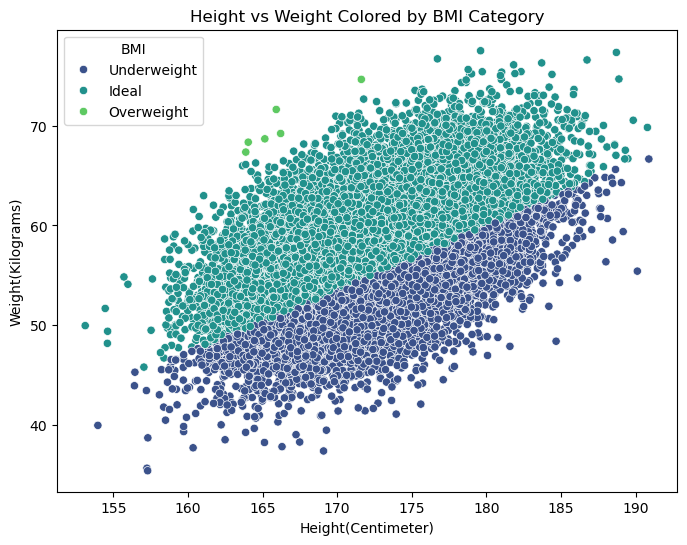

In [ ]:
#Visualy display data
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Height(Centimeter)', y='Weight(Kilograms)', hue='BMI', palette='viridis')
plt.title('Height vs Weight Colored by BMI Category')
plt.show()